In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df_validData = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Experiment_1_OpenEyes.cvs")

In [3]:
# Filter fixations
df_fix = df_validData[df_validData['isFix'].notna()]
df_fix

Unnamed: 0   index  SubjectID  Session  SessionSubsection  \
1                  1       1        365        1                  1   
2                  2       2        365        1                  1   
3                  3       3        365        1                  1   
4                  4       4        365        1                  1   
5                  5       5        365        1                  1   
...              ...     ...        ...      ...                ...   
14588880    15879399  114619        479        3                  3   
14588881    15879400  114620        479        3                  3   
14588882    15879401  114621        479        3                  3   
14588883    15879402  114622        479        3                  3   
14588884    15879403  114623        479        3                  3   

          timeStampDataPointEnd  eyeOpennessLeft  eyeOpennessRight  \
1                  1.635519e+09              1.0               1.0   
2                  1.635519e+09              1.0               1.0   
3                  1.635519e+09              1.0               1.0   
4                  1.635519e+09              1.0               1.0   
5                  1.635519e+09              1.0               1.0   
...                         ...              ...               ...   
14588880           1.653311e+09              1.0               1.0   
14588881           1.653311e+09              1.0               1.0   
14588882           1.653311e+09              1.0               1.0   
14588883           1.653311e+09              1.0               1.0   
14588884           1.653311e+09              1.0               1.0   

          pupilDiameterMillimetersLeft  pupilDiameterMillimetersRight  ...  \
1                             3.291748                       3.744843  ...   
2                             3.291748                       3.744843  ...   
3                             3.259613                       3.707169  ...   
4                             3.259613                       3.707169  ...   
5                             3.207932                       3.690155  ...   
...                                ...                            ...  ...   
14588880                      4.799637                       4.458328  ...   
14588881                      4.799423                       4.456329  ...   
14588882                      4.800644                       4.456482  ...   
14588883                      4.803696                       4.455460  ...   
14588884                      4.731628                       4.452316  ...   

          combined_vel     thresh      isFix corrected_vel events    length  \
1             0.000000  44.460563   0.000000           NaN    2.0  0.672079   
2             0.000000  44.460563   0.000000           NaN    NaN  0.672079   
3            73.369491  44.460563  73.369491           NaN    NaN  0.672079   
4             0.642210  44.460563   0.642210      0.642210    NaN  0.672079   
5             0.545318  44.460563   0.545318      0.545318    NaN  0.672079   
...                ...        ...        ...           ...    ...       ...   
14588880     13.655205  19.311127  13.655205     13.655205    NaN  0.370016   
14588881      0.000000  19.311127   0.000000      0.000000    NaN  0.370016   
14588882      0.000000  19.311127   0.000000      0.000000    NaN  0.370016   
14588883      0.000000  19.311127   0.000000      0.000000    NaN  0.370016   
14588884      0.000000  19.311127   0.000000      0.000000   -2.0  0.370016   

            distance    avg_dist          names  Collider_CategoricalN  
1          63.996796   63.996938   Building_161               Building  
2          63.996796   63.996938   Building_161               Building  
3          63.997106   63.996938   Building_161               Building  
4          63.997107   63.996938   Building_161               Building  
5          63.997138   63.996938   Building_161               Bui

In [4]:
print(df_fix.columns.tolist())

['Unnamed: 0', 'index', 'SubjectID', 'Session', 'SessionSubsection', 'timeStampDataPointEnd', 'eyeOpennessLeft', 'eyeOpennessRight', 'pupilDiameterMillimetersLeft', 'pupilDiameterMillimetersRight', 'leftGazeValidityBitmask', 'rightGazeValidityBitmask', 'combinedGazeValidityBitmask', 'rayCastHitsLeftEye', 'rayCastHitsRightEye', 'eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.x', 'eyeDirectionCombinedWorld.y', 'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x', 'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z', 'eyePositionLeftWorld.x', 'eyePositionLeftWorld.y', 'eyePositionLeftWorld.z', 'eyeDirectionLeftWorld.x', 'eyeDirectionLeftWorld.y', 'eyeDirectionLeftWorld.z', 'eyeDirectionLeftLocal.x', 'eyeDirectionLeftLocal.y', 'eyeDirectionLeftLocal.z', 'eyePositionRightWorld.x', 'eyePositionRightWorld.y', 'eyePositionRightWorld.z', 'eyeDirectionRightWorld.x', 'eyeDirectionRightWorld.y', 'eyeDirectionRight

In [5]:

# Filter only non-NaN events
df_fix2 = df_fix[df_fix['events'].notna()].copy()

records = []

for subject in np.unique(df_fix2.SubjectID):
    df_sub = df_fix2[df_fix2['SubjectID'] == subject]
    for session in np.unique(df_sub.Session):
        df_sess = df_sub[df_sub['Session'] == session]
        for subsection in np.unique(df_sess.SessionSubsection):
            df_part = df_sess[df_sess['SessionSubsection'] == subsection].reset_index(drop=True)

            for i in range(len(df_part) - 1):
                cur = df_part.loc[i, 'events']
                nex = df_part.loc[i + 1, 'events']
                if cur == nex:
                    records.append({
                        'SubjectID': subject,
                        'Session': session,
                        'SessionSubsection': subsection,
                        'index_in_block': i,
                        'global_index': df_part.loc[i].name,
                        'event': cur
                    })

# Create result DataFrame
DoubleEndDF = pd.DataFrame(records)

# Display problematic rows
print(DoubleEndDF)


       SubjectID  Session  SessionSubsection  index_in_block  global_index  \
0            365        1                  1             873           873   
1            365        1                  1            1295          1295   
2            365        1                  1            1321          1321   
3            365        1                  1            1362          1362   
4            365        1                  1            1388          1388   
...          ...      ...                ...             ...           ...   
41526       9601        5                  3            3012          3012   
41527       9601        5                  3            3034          3034   
41528       9601        5                  3            3043          3043   
41529       9601        5                  3            3063          3063   
41530       9601        5                  3            3134          3134   

       event  
0       -2.0  
1        2.0  
2       -2.0  
3  

In [6]:
# Define reference direction (nose pointing forward in local coordinates)
nose_vector = np.array([0, 0, 1])

# Extract gaze direction vectors from DataFrame
gaze_vectors = df_fix[['eyeDirectionCombinedLocal.x',
                       'eyeDirectionCombinedLocal.y',
                       'eyeDirectionCombinedLocal.z']].to_numpy()

# Normalize vectors
def unit_vector(v):
    norm = np.linalg.norm(v, axis=1, keepdims=True)
    return np.divide(v, norm, where=norm != 0)

unit_gaze = unit_vector(gaze_vectors)
nose_vector_unit = nose_vector / np.linalg.norm(nose_vector)

# Compute dot products and angles
dot_products = np.clip(np.dot(unit_gaze, nose_vector_unit), -1.0, 1.0)
angles_rad = np.arccos(dot_products)
angles_deg = np.degrees(angles_rad)

# Assign to DataFrame
df_fix['GazeAngle'] = angles_deg


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_5219/671256791.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['GazeAngle'] = angles_deg


In [7]:
max_values = []
idxs = []
gidxs = []
participants = []
sessions = []
parts = []

values = []

# Ensure correct sort order
df_fix_sorted = df_fix.sort_values(by=['SubjectID', 'Session', 'SessionSubsection', 'index']).reset_index(drop=True)

for participant in np.unique(df_fix_sorted.SubjectID):
    df_sid = df_fix_sorted[df_fix_sorted['SubjectID'] == participant]
    for session in np.unique(df_sid.Session):
        df_ses = df_sid[df_sid['Session'] == session]
        for part in np.unique(df_ses.SessionSubsection):
            df_part = df_ses[df_ses['SessionSubsection'] == part].reset_index()

            for i in range(len(df_part)):
                cur_event = df_part.loc[i, 'events']
                gaze_angle = df_part.loc[i, 'GazeAngle']
                values.append(gaze_angle)

                if cur_event == -2:  # fixation end
                    maxv = np.nanmax(values)
                    max_values.append(maxv)
                    gidxs.append(df_part.loc[i, 'index'])  # global index
                    idxs.append(i)  # local index
                    participants.append(participant)
                    sessions.append(session)
                    parts.append(part)
                    values = []  # reset for next fixation


In [8]:
df_MaxFix = pd.DataFrame()
df_MaxFix['max_angle'] = max_values
df_MaxFix['idxs'] = idxs
df_MaxFix['gidxs'] = gidxs
df_MaxFix['sid'] = participants
df_MaxFix['ses'] = sessions
df_MaxFix['part'] = parts



Mean: 12.459248511131875
SD: 5.995504195212184
Max: 39.97405571141096
Min: 0.07633795393289962


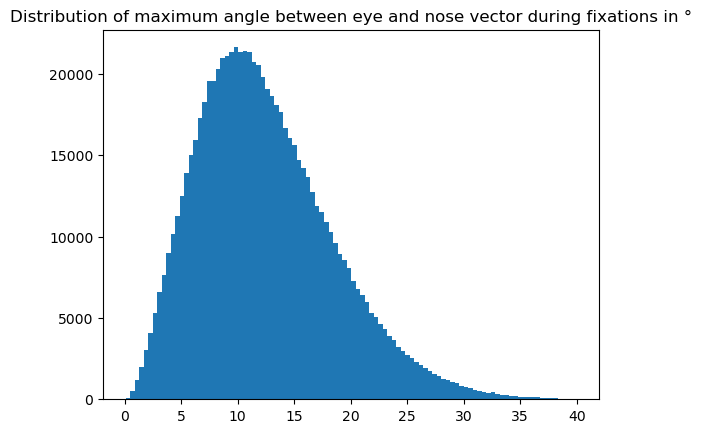

In [9]:
plt.hist(df_MaxFix.max_angle, bins=100)
print('Mean:',np.mean(df_MaxFix.max_angle))
print('SD:',np.std(df_MaxFix.max_angle))
print('Max:',max(df_MaxFix.max_angle))
print('Min:',min(df_MaxFix.max_angle))
plt.title('Distribution of maximum angle between eye and nose vector during fixations in °')
plt.show()

In [11]:
# Meadian, SID & quantiles
SIDs = []
meds = []
p25s = []
p75s = []

for subject in np.unique(df_MaxFix.sid):
    df_subj = df_MaxFix[df_MaxFix['sid'] == subject]
    med = np.nanmedian(df_subj.max_angle)
    p25 = np.quantile(df_subj.max_angle, 0.25)
    p75 = np.quantile(df_subj.max_angle, 0.75)
    SIDs.append(subject)
    meds.append(med)
    p25s.append(p25)
    p75s.append(p75)
    
df_Ang = pd.DataFrame()
df_Ang['SID'] = SIDs
df_Ang['MaxAng_EyeNose_25%'] = p25s
df_Ang['MaxAng_EyeNose_med'] = meds
df_Ang['MaxAng_EyeNose_75%'] = p75s
df_Ang

SID  MaxAng_EyeNose_25%  MaxAng_EyeNose_med  MaxAng_EyeNose_75%
0    365            8.788779           11.324367           14.306582
1    479            8.371687           11.227666           14.758829
2   1754            6.365525            9.701989           14.420664
3   2258            7.184272           10.840264           15.746296
4   2361            9.025643           12.320688           16.375339
5   2693           10.765070           14.358287           18.433204
6   3246            5.447381            8.138552           11.585947
7   3310            9.933950           13.754843           17.560524
8   3572            7.790109           10.930115           14.493454
9   3976            9.902049           13.336771           16.173544
10  4176            6.840384           10.810203           16.094777
11  4597            7.771468           10.723755           14.033848
12  4796           13.764214           17.465069           21.625666
13  4917            7.214069           11.920290           17.945823
14  5238            7.651496           11.145557           15.351365
15  5531            9.412857           13.290808           17.322642
16  5741            7.194141           11.088370           16.049663
17  6642            8.680479           12.670978           17.608883
18  7093            5.955799            9.088540           13.256825
19  7264            6.454613            9.709896           14.152284
20  7412            9.706498           12.643759           16.311478
21  7842           10.835518           15.698000           20.939333
22  8007            6.298961            8.687441           12.073528
23  8469            8.257606           11.229783           15.029046
24  8673            9.145906           12.182325           15.883187
25  8695            6.584166            9.749023           13.949747
26  9472           12.009712           16.170180           20.835084
27  9502            7.591692           10.751579           14.164810
28  9586            6.720335            9.034981           11.582168
29  9601            8.671638           11.669467           15.378178

In [12]:
# Calculate distance between 25th perceptile and 75th percentile & the Bowley coefficient to account for skew
df_Ang['MaxAng_EyeNose_DistQ1-Q3'] = df_Ang['MaxAng_EyeNose_75%'] - df_Ang['MaxAng_EyeNose_25%']
# BOWLEY COEFFICIENT: ranges from -1 to 1, with 0 indicating a symmetrical distribution, negative values indicating a left skew, and positive values indicating a right skew
df_Ang['pd_r_mm_bowleyCoef'] = (df_Ang['MaxAng_EyeNose_75%'] + df_Ang['MaxAng_EyeNose_25%'] - 2*df_Ang['MaxAng_EyeNose_med']) / df_Ang['MaxAng_EyeNose_DistQ1-Q3']

# drop columns not used in further analysis:
df_Ang = df_Ang.drop(['MaxAng_EyeNose_25%', 'MaxAng_EyeNose_75%'], axis=1)
df_Ang

SID  MaxAng_EyeNose_med  MaxAng_EyeNose_DistQ1-Q3  pd_r_mm_bowleyCoef
0    365           11.324367                  5.517802            0.080943
1    479           11.227666                  6.387142            0.105710
2   1754            9.701989                  8.055138            0.171594
3   2258           10.840264                  8.562024            0.145998
4   2361           12.320688                  7.349696            0.103352
5   2693           14.358287                  7.668134            0.062819
6   3246            8.138552                  6.138566            0.123192
7   3310           13.754843                  7.626574           -0.001995
8   3572           10.930115                  6.703345            0.063152
9   3976           13.336771                  6.271495           -0.095344
10  4176           10.810203                  9.254392            0.142068
11  4597           10.723755                  6.262380            0.057136
12  4796           17.465069                  7.861452            0.058481
13  4917           11.920290                 10.731754            0.122935
14  5238           11.145557                  7.699869            0.092436
15  5531           13.290808                  7.909785            0.019455
16  5741           11.088370                  8.855522            0.120497
17  6642           12.670978                  8.928405            0.106111
18  7093            9.088540                  7.301026            0.141835
19  7264            9.709896                  7.697671            0.154216
20  7412           12.643759                  6.604980            0.110592
21  7842           15.698000                 10.103816            0.037496
22  8007            8.687441                  5.774567            0.172759
23  8469           11.229783                  6.771440            0.122143
24  8673           12.182325                  6.737281            0.098622
25  8695            9.749023                  7.365580            0.140636
26  9472           16.170180                  8.825373            0.057158
27  9502           10.751579                  6.573118            0.038543
28  9586            9.034981                  4.861834            0.047830
29  9601           11.669467                  6.706540            0.105998

In [13]:
df_Ang.to_csv("/Volumes/TwoTeras/PCA/Data_Sets/Experiment_1/MaxGazeAnglePerFix.csv", index=False)
